# Daytime vs nighttime wind and solar

In [51]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

In [84]:
%cd /g/data/w42/dr6273/work/AEMO_compound_events/

import functions as fn

/g/data/w42/dr6273/work/AEMO_compound_events


In [85]:
plt_params = fn.get_plot_params()
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
aus_region = {
    'name': 'AUS',
    'boundary': [112, 155, -10, -45]
}

In [3]:
years = range(1959, 2022)

In [4]:
root_path = '/g/data/rt52/era5/single-levels/'

### Hourly radiation data

In [5]:
mssrd = xr.open_zarr(
    '/g/data/w42/dr6273/work/data/era5/msdwswrf/msdwswrf_era5_reanalysis_sfc_'+str(years[0])+'-'+str(years[-1])+'_'+aus_region['name']+'_region.zarr',
    consolidated=True
)

### Look at a single grid cell

In [14]:
sydney = mssrd["msdwswrf"].sel(lat=-35, lon=151, time="2010").compute()

In [65]:
townsville = mssrd["msdwswrf"].sel(lat=-19.25, lon=146, time="2010").compute()

In [96]:
def plot_ts(ax, da, time_slice, title, legend=False):
    """ Plot hourly, daily and daytime time series """
    hourly = da.sel(time=time_slice)
    daily = hourly.resample(time="1D").mean()
    daytime = hourly.where(hourly > 0).resample(time="1D").mean()
    
    cor = xr.corr(daily, daytime, "time").values
    
    hourly.plot(ax=ax, label="Hourly", color="dimgray")
    daily.plot(ax=ax, label="Daily average", color=colors[6])
    daytime.plot(ax=ax, label="Daytime average", color=colors[2])
    
    ax.set_ylabel("Radiation\n"+r"[Wm$^{2}$]")
    ax.set_xlabel("")
    ax.set_title(title + r" ($r=$" + str(np.round(cor, 3)) + ")")
    
    if legend:
        ax.legend()

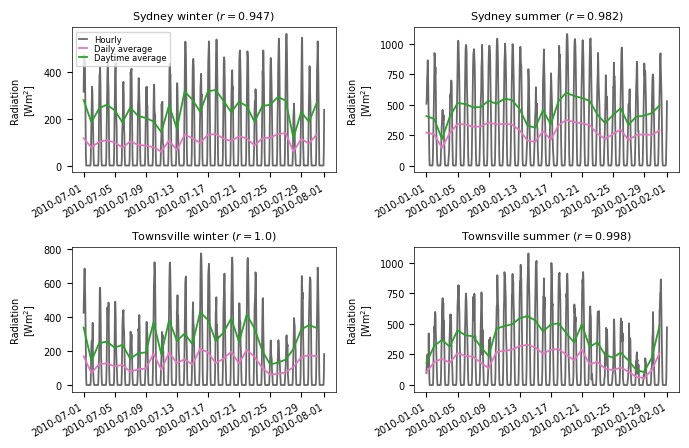

In [108]:
with plt.rc_context(plt_params):
    fig, axes = plt.subplots(2, 2, figsize=(6.9, 4.5))

    plot_ts(axes[0,0], sydney, slice("2010-07-01", "2010-07-31"), "Sydney winter", legend=True)
    plot_ts(axes[0,1], sydney, slice("2010-01-01", "2010-01-31"), "Sydney summer")
    plot_ts(axes[1,0], townsville, slice("2010-07-01", "2010-07-31"), "Townsville winter")
    plot_ts(axes[1,1], townsville, slice("2010-01-01", "2010-01-31"), "Townsville summer")

    plt.tight_layout()
    
    plt.savefig("figures/FigR1_daytime_solar.pdf", format='pdf', dpi=400, bbox_inches='tight')